# Animation

In [1]:
import xarray as xr
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import ffmpeg
import pylab as pl
from math import radians, cos

In [2]:
def loadNetCDFs(varname):
    dsw=[]
    dsn=[]
    for i in np.arange(0,8,1):
        
        if varname=='DYNVARS':
            pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
            pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        else:
            pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01b_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
            pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01b_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
        dswin  = xr.open_dataset(pathw)
        dsnin = xr.open_dataset(pathn)
        
        dsw.append(dswin)
        dsn.append(dsnin)
        
    return dsw, dsn

In [3]:
dsw,dsn=loadNetCDFs('DYNVARS')

In [4]:
def get_snapshot_at_level(t,dep,dsw,dsn):
    ind=1
    if t>=72 and t <(72*2):
        ind=1
        t=t-72
    elif t>=(72*2) and t<(72*3):
        ind=2
        t=t-(72*2)
    elif t>=(72*3) and t<(72*4):
        ind=3
        t=t-(72*3)
    elif t>=(72*4) and t<(72*5):
        ind=4
        t=t-(72*4)
    elif t>=(72*5) and t<(72*6):
        ind=5
        t=t-(72*5)
    elif t>=(72*6) and t<(72*7):
        ind=6
        t=t-(72*6)
    elif t>=(72*7) and t<(72*8):
        ind=7
        t=t-(72*7)
    
    Ww=dsw[ind].WVEL[t,dep,:,:].values
    Wn=dsn[ind].WVEL[t,dep,:,:].values
    W = Ww-Wn
    return(W)

def animate(t):
    t=t+100
    tt=(t*20+2880)/60
    dep=55
    vmin=-0.000002
    vmax=0.000002
    print(t)
    W = get_snapshot_at_level( t,dep,dsw,dsn)
    

    cax.set_array(np.ma.masked_array(W,mask=maskw[dep,:,:]))
    ax.set_title(f'At depth {Z[dep].values:.2f} m. After {tt:.1f} hours')


In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='AM'), bitrate=2000)

In [27]:
params = {'font.size': 22,
          'figure.figsize': (12, 8),
         'font.family':'sans'}
pl.rcParams.update(params)

In [7]:
#Index to call from the list of netcdfs
ind=1 #0 is day 2-3, 1 is day 3-4 until index 7 (day 9-10)
dep=55  #483.2 meter depth is the 55th element
t=100-72
tt=(((72*ind+t)*20)+2880)/60 # Gives amount of hours from start of the model, starts at hour 48 if ind=0 and t=0


Ww=dsw[ind].WVEL
Wn=dsn[ind].WVEL
Win=Ww[t,dep,:,:]-Wn[t,dep,:,:]
LON=dsw[ind].XC-360
LAT=dsw[ind].YC
Z=dsw[ind].Zl

hFacCw = dsn[ind].hFacC
hFacCusew=hFacCw.values

hfa = np.ma.masked_values(hFacCusew, 0)
maskw = np.ma.getmask(hfa)

100
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348


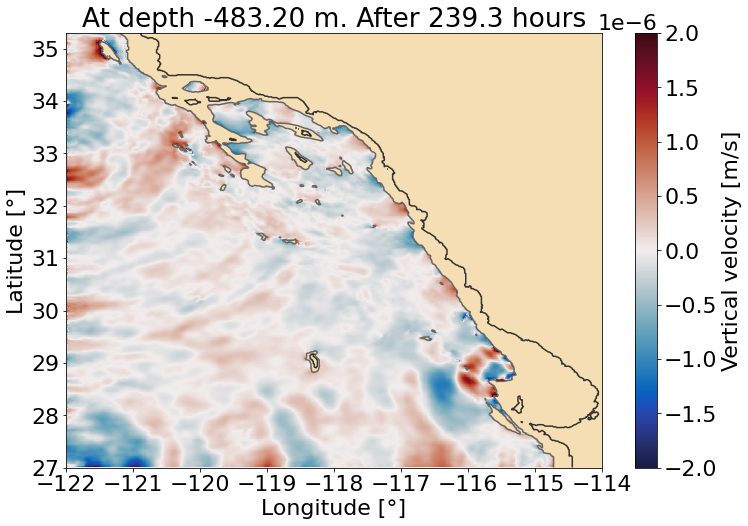

In [29]:
fig, ax = plt.subplots()

vmin=-0.000002
vmax=0.000002

xlab='Longitude [°]'
ylab='Latitude [°]'

ax.set_facecolor('wheat')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(Win,mask=maskw[dep,:,:]),
                    cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2','0.4'], 
                levels=[0,500])
ax.set(xlabel=xlab, ylabel=ylab)

ax.set_title(f'At depth {Z[dep].values:.2f} m. After {tt:.1f} hours')
ax.set_xlim(-122,-114)     
cbar = plt.colorbar(cax)
cbar.set_label('Vertical velocity [m/s]')
ax.set_ylim(27,35.3)

anim = FuncAnimation(fig, animate,frames=475, repeat=False)

    
anim.save('WVEL_attempt3.mp4', writer=writer, dpi=600)

## SSH

In [9]:
pathETA='/media/amelia/Trillian/SVB/ETA.nc'
dsETA= xr.open_dataset(pathETA)
depth=dsw[0].Depth.values

In [10]:
etafiltall=dsETA.ETAfiltall.values
LON=dsETA.x.values
LAT=dsETA.y.values
TIME=dsETA.time.values
hFacC = dsn[0].hFacC.values
hfa = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfa)

In [30]:
def animateETA(t):
    tin=t+100
    tt=(tin*20+2880)/60
    dep=0
    vmin=-0.01*10
    vmax=0.01*10
    print(tin)
    eta = etafiltall[tin,:,:]
    

    cax.set_array(np.ma.masked_array(eta*1000,mask=mask[dep,:,:]))
    ax.set_title(f'After {tt:.1f} hours')

In [31]:
params = {'font.size': 22,
          'figure.figsize': (12, 8),
         'font.family':'sans'}
pl.rcParams.update(params)

In [8]:
np.shape(etafiltall)

(576, 612, 512)

In [32]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='AM'), bitrate=2000)

/tmp/ipykernel_6028/3214425842.py:12: UserWarning: No contour levels were found within the data range.
  ax.contour(LON,LAT,depth,  colors=['0.2'],


100
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348


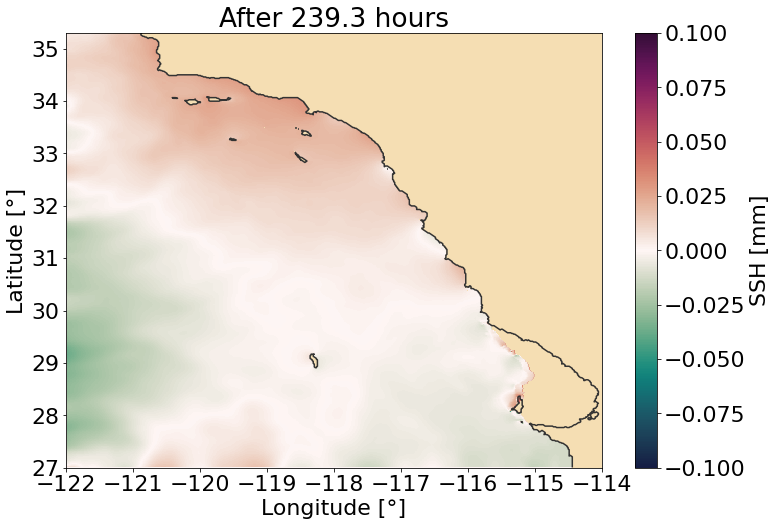

In [34]:
fig, ax = plt.subplots()
    
vmin=-0.01*10
vmax=0.01*10
t=100
tt=((t*20)+2880)/60
xlab='Longitude [°]'
ylab='Latitude [°]'

ax.set_facecolor('wheat')
cax = ax.pcolormesh(LON,LAT,np.ma.masked_array(etafiltall[100,:,:]*1000, mask=mask[0,:,:]),cmap=cmocean.cm.curl,vmin=vmin,vmax=vmax)
ax.contour(LON,LAT,depth,  colors=['0.2'], 
                levels=[0])
ax.set(xlabel=xlab, ylabel=ylab)

ax.set_title(f'After {tt:.1f} hours')
ax.set_xlim(-122,-114)     
cbar = plt.colorbar(cax)
cbar.set_label('SSH [mm]')
ax.set_ylim(27,35.3)

anim = FuncAnimation(fig, animateETA,frames=475, repeat=False)

    
anim.save('SSHfeb.mp4', writer=writer, dpi=600)

## Vertical animation NOT WORKING YET

In [15]:
dsfilt=xr.open_dataset('PHIHYD3084filt.nc')
dsw,dsn=loadNetCDFs('PHIHYD')

In [16]:
varname='WVEL'
i=1
pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'ACnoSVBdep55'+ str(2+i)+'_'+ str(3+i) +'all.nc'
ds1  = xr.open_dataset(pathn)
lat_ac=ds1.latAC

In [42]:
VALfilt=dsfilt.VALfilt.values
Z=dsfilt.z
dist=dsfilt.x
ind=lat_ac[58]
lat=30.84
t=0
tt=0

t2=-1
tt2=-1

depths=np.arange(71,0,-1)

hFacC = dsw[0].hFacC
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
masky=mask[depths,ind,:]
coast=np.where(mask[0,ind,:]==False)

LON = dsw[0].XC[coast]-360

distance=cos((lat*np.pi)/180)*111*-1*(LON-LON[-1])

if lat>32:
    indlonpre=np.where(distance<=80)
else:
    indlonpre=np.where(distance<=99)

indlon=np.flip(indlonpre[0])


VALb=dsw[tt].PHIHYD[t,depths,ind,indlon].values
VALn=dsn[tt].PHIHYD[t,depths,ind,indlon].values
VALmit=VALb-VALn

VALb=dsw[tt2].PHIHYD[t2,depths,ind,indlon].values
VALn=dsn[tt2].PHIHYD[t2,depths,ind,indlon].values
VALmit2=VALb-VALn

/tmp/ipykernel_14966/2551834573.py:27: UserWarning: No contour levels were found within the data range.
  ax[1,0].contour(dist, Z,np.ma.masked_array(VALmit,mask=masky[:,indlon]), levels=[0], linewidths=2,
/tmp/ipykernel_14966/2551834573.py:41: UserWarning: No contour levels were found within the data range.
  ax[0,1].contour(dist, Z,np.ma.masked_array(VALfilt[t2,:,:],mask=masky[:,indlon]), levels=[0], linewidths=2,
/tmp/ipykernel_14966/2551834573.py:55: UserWarning: No contour levels were found within the data range.
  ax[1,1].contour(dist, Z,np.ma.masked_array(VALmit2,mask=masky[:,indlon]), levels=[0], linewidths=2,


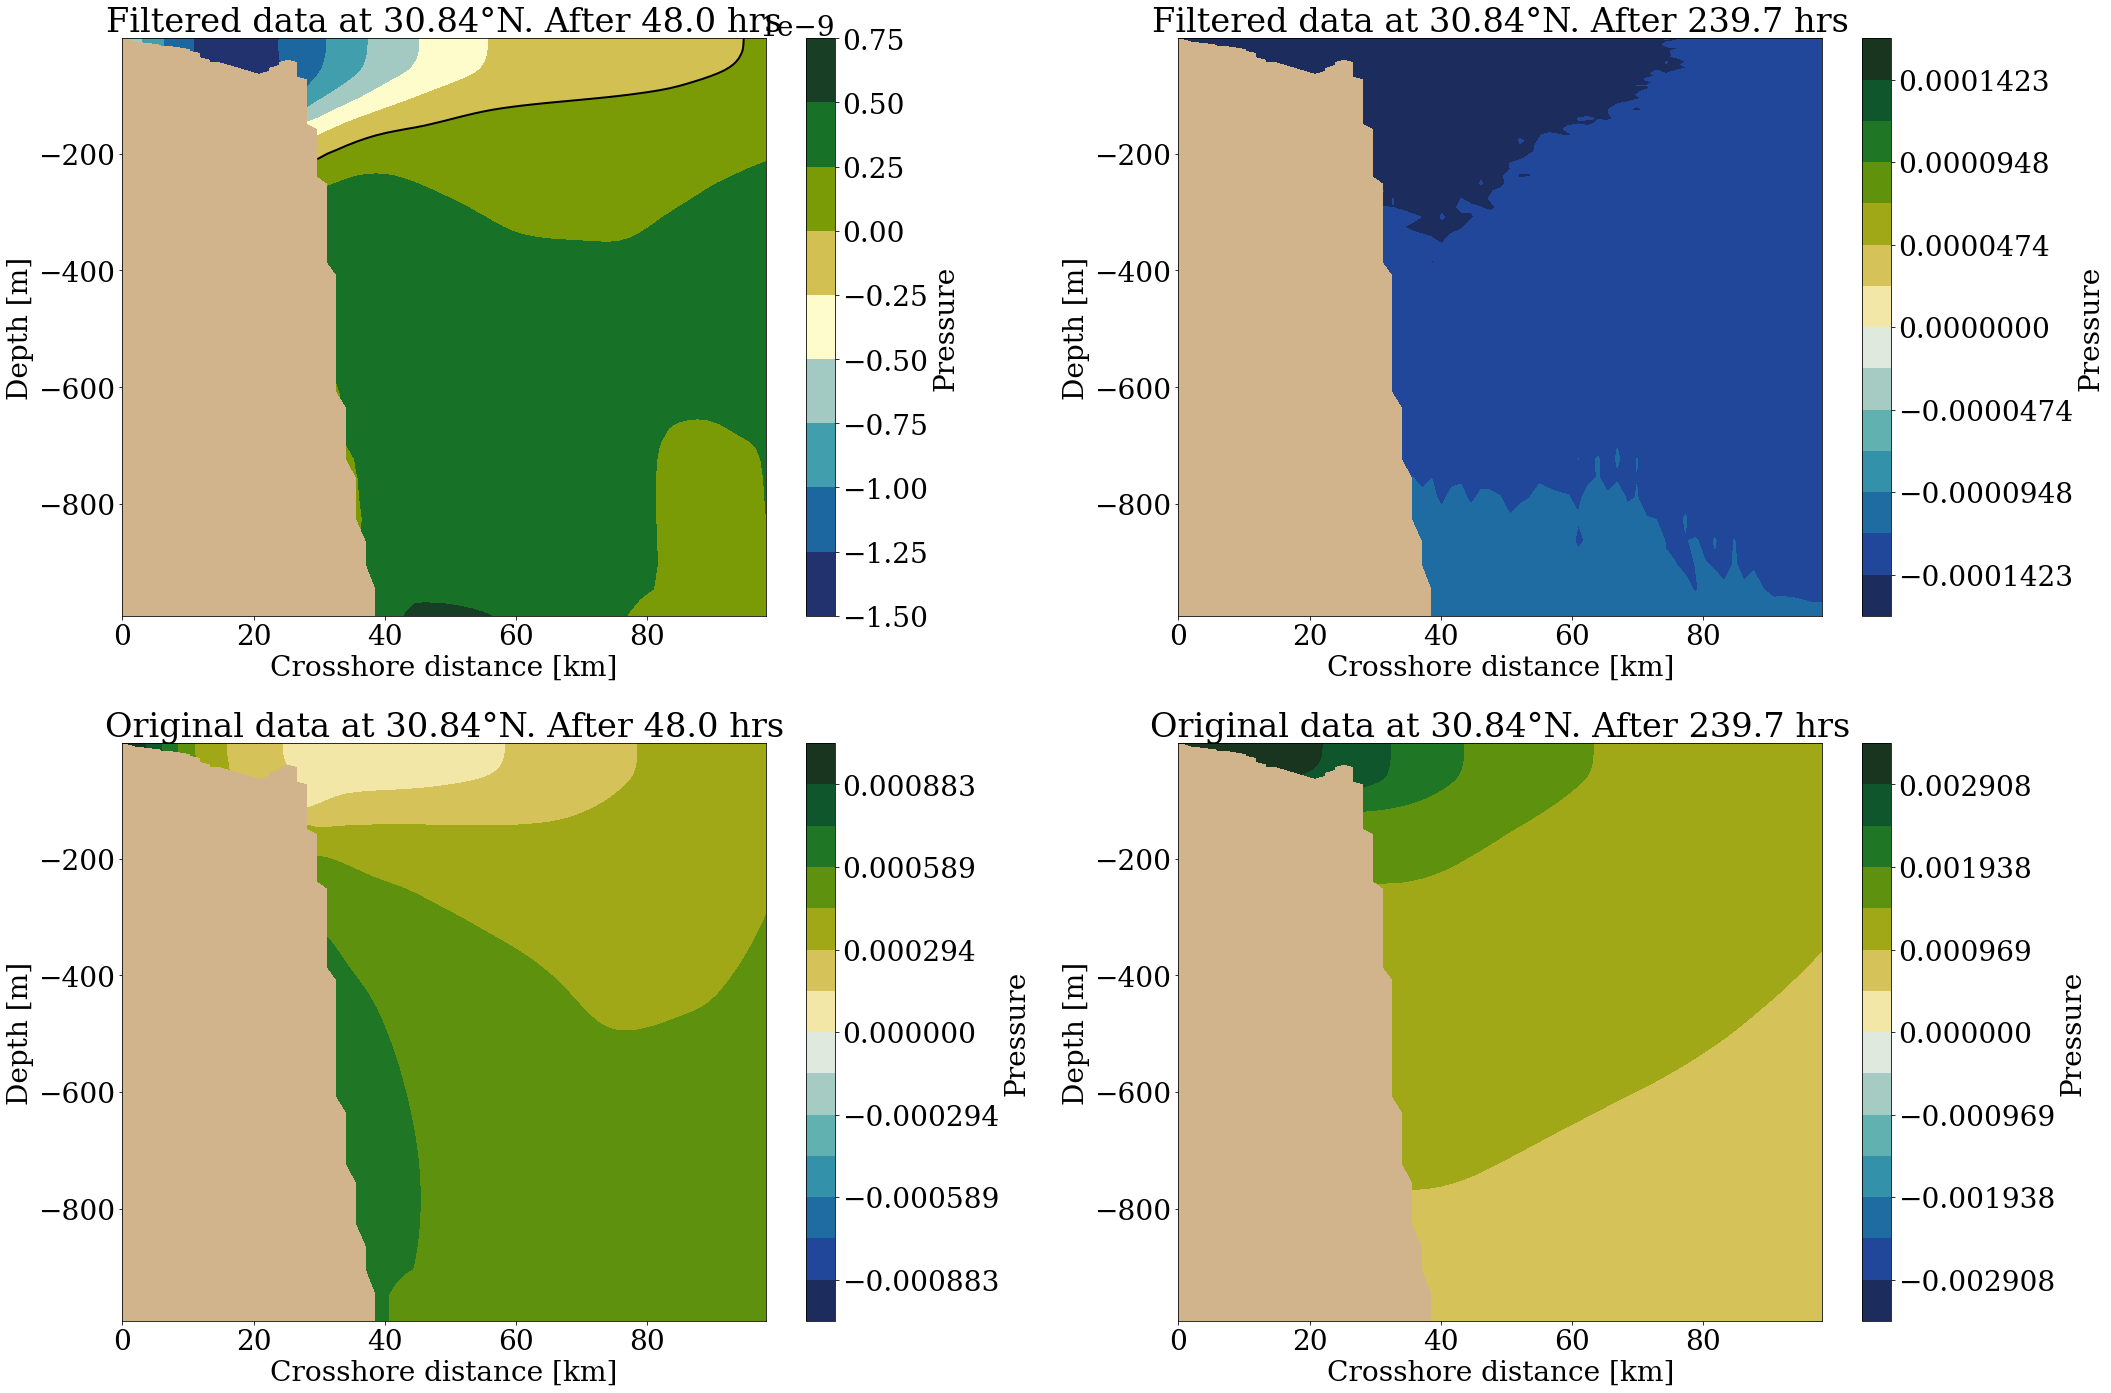

In [66]:
fig,ax=plt.subplots(2,2)
xlab='Crosshore distance [km]'
ylab='Depth [m]'

vmin=-np.max(abs(VALfilt[0,:,:]))
vmax=np.max(abs(VALfilt[0,:,:]))

levels=np.linspace(vmin,vmax,15)

ax[0,0].set_facecolor('tan')
cax=ax[0,0].contourf(dist,Z,np.ma.masked_array(VALfilt[t,:,:],mask=masky[:,indlon]),cmap=cmocean.cm.delta)#,levels=levels)
ax[0,0].contour(dist,Z,np.ma.masked_array(VALfilt[t,:,:],mask=masky[:,indlon]), levels=[0], linewidths=2, 
                    linestyles='-', colors='k', zorder=2)
ax[0,0].set(xlabel=xlab, ylabel=ylab)
ax[0,0].set_title(f'Filtered data at 30.84°N. After {dsfilt.time[t].values/60:.1f} hrs')
cbar = fig.colorbar(cax,ax=ax[0,0])
cbar.set_label('Pressure')

vmin=-np.max(abs(VALmit))
vmax=np.max(abs(VALmit))

levels=np.linspace(vmin,vmax,15)


ax[1,0].set_facecolor('tan')
cax1=ax[1,0].contourf(dist,Z,np.ma.masked_array(VALmit,mask=masky[:,indlon]),cmap=cmocean.cm.delta,levels=levels)
ax[1,0].contour(dist, Z,np.ma.masked_array(VALmit,mask=masky[:,indlon]), levels=[0], linewidths=2, 
                linestyles='-', colors='k', zorder=2)
ax[1,0].set(xlabel=xlab, ylabel=ylab)
ax[1,0].set_title(f'Original data at 30.84°N. After {dsfilt.time[t].values/60:.1f} hrs')
cbar = fig.colorbar(cax1,ax=ax[1,0])
cbar.set_label('Pressure')

vmin=-np.max(abs(VALfilt[t2,:,:]))
vmax=np.max(abs(VALfilt[t2,:,:]))

levels=np.linspace(vmin,vmax,15)

ax[0,1].set_facecolor('tan')
cax2=ax[0,1].contourf(dist,Z,np.ma.masked_array(VALfilt[t2,:,:],mask=masky[:,indlon]),cmap=cmocean.cm.delta,levels=levels)
ax[0,1].contour(dist, Z,np.ma.masked_array(VALfilt[t2,:,:],mask=masky[:,indlon]), levels=[0], linewidths=2, 
                linestyles='-', colors='k', zorder=2)
ax[0,1].set(xlabel=xlab, ylabel=ylab)
ax[0,1].set_title(f'Filtered data at 30.84°N. After {dsfilt.time[t2].values/60:.1f} hrs')
cbar = fig.colorbar(cax2,ax=ax[0,1])
cbar.set_label('Pressure')

vmin=-np.max(abs(VALmit2))
vmax=np.max(abs(VALmit2))

levels=np.linspace(vmin,vmax,15)

ax[1,1].set_facecolor('tan')
cax3=ax[1,1].contourf(dist,Z,np.ma.masked_array(VALmit2,mask=masky[:,indlon]),cmap=cmocean.cm.delta,levels=levels)
ax[1,1].contour(dist, Z,np.ma.masked_array(VALmit2,mask=masky[:,indlon]), levels=[0], linewidths=2, 
                linestyles='-', colors='k', zorder=2)
ax[1,1].set(xlabel=xlab, ylabel=ylab)
ax[1,1].set_title(f'Original data at 30.84°N. After {dsfilt.time[t2].values/60:.1f} hrs')
cbar = fig.colorbar(cax3,ax=ax[1,1])
cbar.set_label('Pressure')
fig.tight_layout()

In [61]:
def get_snapshot_at_level(t,VALFITp):
    P=VALFITp[t,:,:]
    return(P)

def animate(t):
    tt=(t*10+2880)/60
    print(t)
    P = get_snapshot_at_level( t,VALFITp)
    
    vmin=-np.max(abs(VALFITp[0,:,:]))
    vmax=np.max(abs(VALFITp[0,:,:]))
    cax.set_array(np.ma.masked_array(P,mask=masky[:,indlon]))
    
    ax0.set_title(f'At 30.84°N. After {tt:.1f} hours')


In [8]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='AM'), bitrate=2000)

In [65]:
params = {'font.size': 28,
          'figure.figsize': (30, 20),
         'font.family':'serif'}
pl.rcParams.update(params)

In [ ]:
fig,ax0=plt.subplots()
xlab='Crosshore distance [km]'
ylab='Depth [m]'

ax0.set_facecolor('tan')
cax=ax0.pcolormesh(dist,Z,np.ma.masked_array(Pin,mask=masky[:,indlon]),cmap=cmocean.cm.delta)#,levels=levels)
#ax0.contour(dist,Z,np.ma.masked_array(Pin,mask=masky[:,indlon]), levels=[0], linewidths=2, 
#                    linestyles='-', colors='k', zorder=2)
ax0.set(xlabel=xlab, ylabel=ylab)
ax0.set_title(f'At 30.84°N. After {2880/60:.1f} hours')
cbar = plt.colorbar(cax)
cbar.set_label('Pressure')

anim = FuncAnimation(fig, animate,frames=792, repeat=False)

    
anim.save('PHIHYDfiltvert.mp4', writer=writer, dpi=600)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
